In [1]:
# Importing required Libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Step 1 : Reading and Understanding Data 

In [2]:
# Reading the given data
leads = pd.read_csv('Leads.csv')
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# Checking the column-wise info of the dataframe
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [4]:
# Checking shape of dataframe
leads.shape

(9240, 37)

- There are 9240 Rows and 37 Initial Columns

In [5]:
# Checking Statistical Parameters of the given data
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# Step 2 : EDA & Data Cleaning

### Checking for Duplicate Values

In [6]:
leads.duplicated(subset = 'Lead Number').sum()

## 0 Indicates there are no duplicate values

0

In [7]:
leads.duplicated(subset = 'Prospect ID').sum()

## 0 Indicates there are no duplicate values

0

- No duplication of data was found on inspection of columns 'Prospect ID'and 'Lead Number'.

### Cleaning & Missing values treatement

- <font color = brown > Column 'Prospect ID'and 'Lead Number' were not required for further model building and thus were dropped. </font>

In [8]:
# Dropping lead numer and prospect ID since they are containing the information like S.No or ID Number

leads.drop(['Lead Number', 'Prospect ID'], axis = 1, inplace = True)

leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


#### Handling of Select Level in Categorical Variables

- Replacing SELECT variable with np.nan since multiple value counts are there and it is as good as Null as per problem statement


In [9]:
# Checking the column index number of a categorical column to find no.of SELECT counts

leads.columns.get_loc('Specialization')

10

In [10]:
## Checking no.of SELECT counts in categorical variables. 
## Used SPECIALIAZIATION column for this Step

leads.iloc[:,10].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

#### Replacing 'Select'  with np.nan in the entire Data

In [11]:
## Replacing SELECT variable with np.nan since multiple value counts are there and it is as good as Null as per problem statement

leads.replace('Select', np.nan, inplace= True)

leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Imputation or Treatment of Null Values

In [12]:
## counting null values in each column

leads.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [13]:
# Checking percentage of null values in each column

round(leads.isnull().mean()*100,2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

### Dropping columns with null values more than or equal to 45%

In [14]:
## dropping columns with null values more than or equal to 45%

for col in leads.columns:
    if (round(leads[col].isnull().mean()*100,2) >= 45):
        leads.drop(col,axis = 1, inplace = True)

In [15]:
## Checking the null value percentages after dropping above 45% nulls

round(leads.isnull().mean()*100,2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [16]:
# Checking the list of Columns for further process
list(leads.columns)

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'Last Activity',
 'Country',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Tags',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'City',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

#### <font color = blue> Country Column </font>

In [17]:
# Checking value counts of 'Country'  column - categorical
leads.Country.value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
unknown                    5
Kuwait                     4
Nigeria                    4
South Africa               4
Canada                     4
Germany                    4
Sweden                     3
Italy                      2
Bangladesh                 2
Uganda                     2
Philippines                2
Netherlands                2
Belgium                    2
Ghana                      2
China                      2
Asia/Pacific Region        2
Russia                     1
Vietnam                    1
Indonesia                  1
Kenya                      1
Liberia                    1
Switzerland   

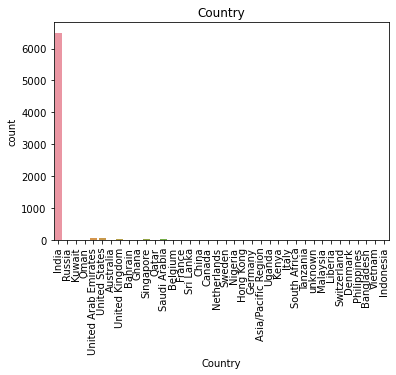

In [18]:
#Plotting Countplot for Country

sns.countplot(x='Country', data=leads )
plt.title('Country')
plt.xticks(rotation = 90)
plt.show()

In [19]:
# Checking percentage of INDIA in Country column 

round(100*len(leads[leads.Country == 'India'])/len(leads.Country),2)

70.26

#### Dropping Country Column

- India value is occuring more than 70% in Country Column and if we replace missing values with mode value, then India's occuring will be 90%.
- Hence Dropping the Country column to reduce the imbalance while building model

In [20]:
leads = leads.drop(columns = ['Country'], axis = 1)

#### <font color = blue> Specilization Column </font>

In [21]:
# Checking value counts of specilization Column
leads.Specialization.value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

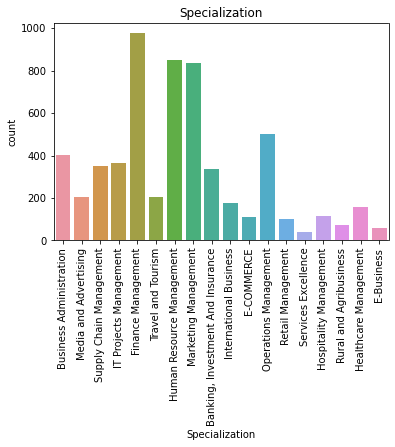

In [22]:
#Plotting Count Plot

sns.countplot(x='Specialization', data=leads )
plt.title('Specialization')
plt.xticks(rotation = 90)
plt.show()

-  Replacing null values with Not Specified value because we cannot substitute Mode value for not provided information about Specialization( as per data dictionery)



In [23]:
leads.Specialization.replace(np.nan, 'Not Specified', inplace= True)

In [24]:
#### Combining management specilization based on low occurance or frequency

leads.Specialization.replace(['Finance Management','Human Resource Management','Marketing Management','Operations Management',
                              'IT Projects Management','Supply Chain Management','Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management_Specialization',inplace= True)

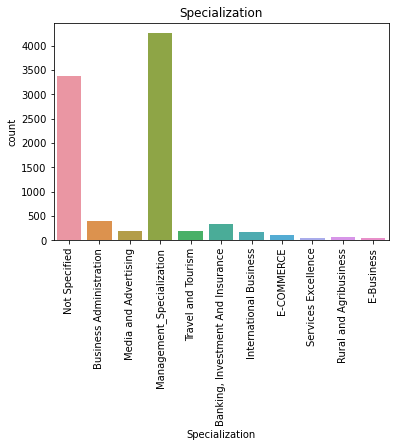

In [25]:
#Plotting Count Plot after combining low frequent levels

sns.countplot(x='Specialization', data=leads )
plt.title('Specialization')
plt.xticks(rotation = 90)
plt.show()

#### <font color = blue> Current Occupation Column </font>

In [26]:
# Checking value counts of 'what is your current occupation column'
leads['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

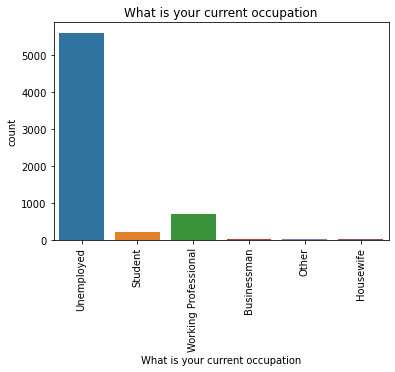

In [27]:
#Plotting count plot

sns.countplot(x='What is your current occupation', data=leads )
plt.title('What is your current occupation')
plt.xticks(rotation = 90)
plt.show()

In [28]:
# replacing nan values with mode = Unemployed

leads['What is your current occupation'] = leads['What is your current occupation'].replace(np.nan,leads['What is your current occupation'].mode()[0] )

#### <font color = blue> What matters most to you in choosing a course Column </font>

In [29]:
#  Checking value counts of 'What matters most to you in choosing a course'
leads['What matters most to you in choosing a course'].value_counts(dropna= False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

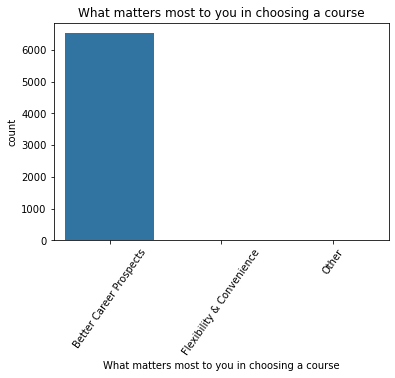

In [30]:
# Plotting Count Plot

sns.countplot(x='What matters most to you in choosing a course', data=leads )
plt.title('What matters most to you in choosing a course')
plt.xticks(rotation = 55)
plt.show()

In [31]:
# Checking percentage

round(100*len(leads[leads['What matters most to you in choosing a course']=='Better Career Prospects'])/len(leads['What matters most to you in choosing a course']),2)

70.65

In [32]:
# Dropping the 'What matters most to you in choosing a course' column since it has one value occuring more than 70% times

leads = leads.drop(columns = 'What matters most to you in choosing a course', axis = 1)

In [33]:
# Checking remaining Columns
leads.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

#### <font color = blue> Lead Origin Column </font>

In [34]:
leads['Lead Origin'].value_counts(dropna=False)

# no need to treat based on less missing values and no imbalance

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

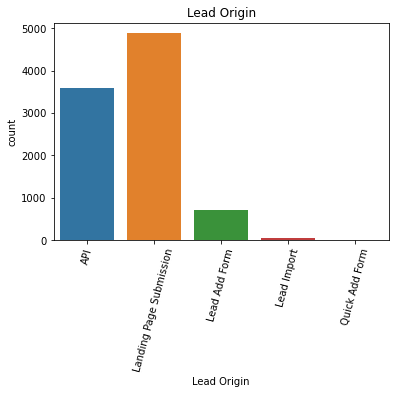

In [35]:
# Plotting Count Plot

sns.countplot(x='Lead Origin', data=leads )
plt.title('Lead Origin')
plt.xticks(rotation = 75)
plt.show()

#### <font color = blue> Lead Source Column </font>

In [36]:
leads['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
testone                 1
blog                    1
NC_EDM                  1
WeLearn                 1
welearnblog_Home        1
Pay per Click Ads       1
youtubechannel          1
Name: Lead Source, dtype: int64

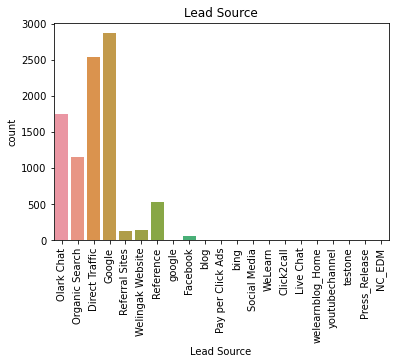

In [37]:
# Plotting Count Plot

sns.countplot(x='Lead Source', data=leads )
plt.title('Lead Source')
plt.xticks(rotation = 90)
plt.show()

In [38]:
# Google appears twice with different formats/cases. Hence we should convert all rows with proper case - Google
# Replacing low frequency values with 'Other' and null values as well with 'Other'

leads['Lead Source'].replace('google','Google', inplace= True)
leads['Lead Source'] = leads['Lead Source'].replace('Facebook','Social Media')
leads['Lead Source'] = leads['Lead Source'].replace(['bing','Click2call','Press_Release','Live Chat'
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'] ,'Other')   
leads['Lead Source'].replace(np.nan,'Other', inplace=True)

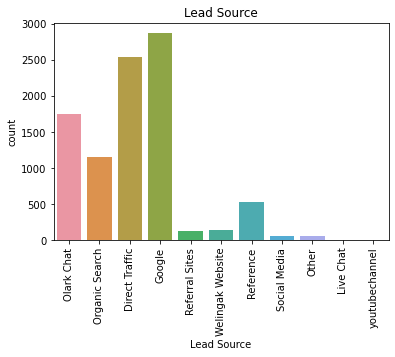

In [39]:
# Plotting Count Plot after replacement of levels

sns.countplot(x='Lead Source', data=leads )
plt.title('Lead Source')
plt.xticks(rotation = 90)
plt.show()

#### <font color = blue> TotalVisits Column </font>

In [40]:
leads['TotalVisits'].value_counts(dropna=False)

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
NaN       137
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
27.0        5
25.0        5
24.0        5
22.0        3
26.0        2
29.0        2
28.0        2
115.0       1
54.0        1
43.0        1
30.0        1
32.0        1
74.0        1
251.0       1
41.0        1
141.0       1
42.0        1
55.0        1
Name: TotalVisits, dtype: int64

Text(0.5, 1.0, 'TotalVisits')

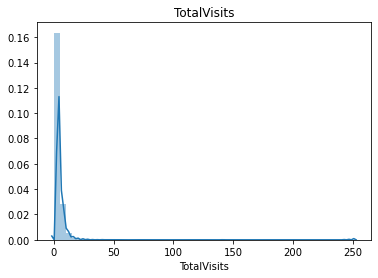

In [41]:
# Plot for TotalVisits

sns.distplot(leads['TotalVisits'])
plt.title('TotalVisits')

- Column 'TotalVisits' of the dataframe is numeric and is having 1.48 % of missing values. The column being skewed these missing values were replaced with median.

In [42]:
# replacing missing values with median since it is not categorical variable
print(leads['TotalVisits'].median())

leads['TotalVisits'].replace(np.nan,leads['TotalVisits'].median(), inplace= True)

3.0


#### <font color = blue> Page Views Per Visit Column </font>

In [43]:
leads['Page Views Per Visit'].value_counts(dropna=False)

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
1.45       1
1.64       1
1.21       1
2.14       1
3.83       1
Name: Page Views Per Visit, Length: 115, dtype: int64

Text(0.5, 1.0, 'Page Views Per Visit')

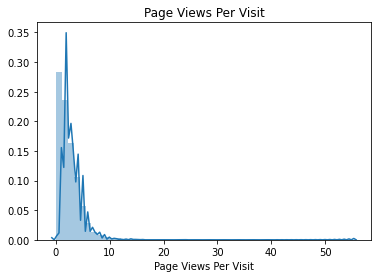

In [44]:
# Plot for Page Views Per Visit

sns.distplot(leads['Page Views Per Visit'])
plt.title('Page Views Per Visit')

In [45]:
# Replacing with median value

leads['Page Views Per Visit'].replace(np.nan, leads['Page Views Per Visit'].median(),inplace=True)
leads['Page Views Per Visit'].median()

2.0

- Column 'Page Views Per Visit' of the dataframe is numeric and is having 1.48 % of missing values. The column being skewed these missing values were replaced with median.

#### <font color = blue> Last Activity Column </font>

In [46]:
leads['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

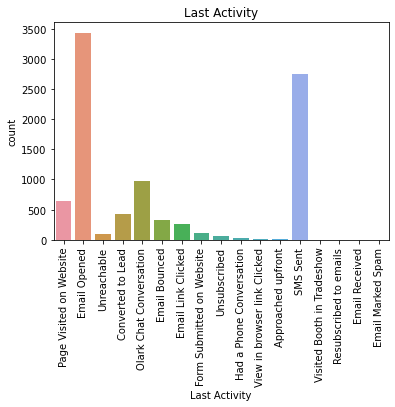

In [47]:
# Plotting count plot

sns.countplot(x='Last Activity', data=leads )
plt.title('Last Activity')
plt.xticks(rotation = 90)
plt.show()

In [48]:
# Replacing missing values with 'Others' since imputing it with mode value will lead to wrong lead impression
leads['Last Activity'].replace(np.nan, 'Others', inplace=True)

- Column 'Last Activity' of the dataframe was having 1.11 % of missing valueswhich were substituted with Others.

#### <font color = blue> City Column </font>

In [49]:
leads['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

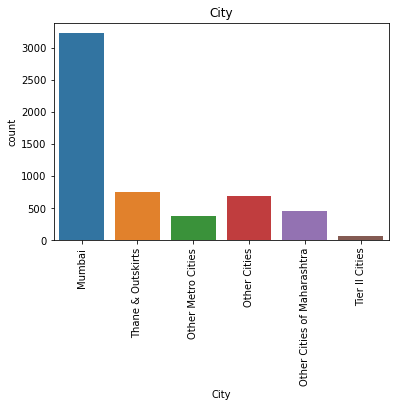

In [50]:
sns.countplot(x='City', data=leads )
plt.title('City')
plt.xticks(rotation = 90)
plt.show()

In [51]:
# replacing missing values with mode
leads['City'].replace(np.nan, leads['City'].mode()[0], inplace=True)

- Column 'City' of the dataframe was having 39.7 % of missing values which were substituted with 'Mumbai(Mode)'

### Re-checking missing values in each column

In [52]:
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                                  0.00
Lead Source                                  0.00
Do Not Email                                 0.00
Do Not Call                                  0.00
Converted                                    0.00
TotalVisits                                  0.00
Total Time Spent on Website                  0.00
Page Views Per Visit                         0.00
Last Activity                                0.00
Specialization                               0.00
What is your current occupation              0.00
Search                                       0.00
Magazine                                     0.00
Newspaper Article                            0.00
X Education Forums                           0.00
Newspaper                                    0.00
Digital Advertisement                        0.00
Through Recommendations                      0.00
Receive More Updates About Our Courses       0.00
Tags                                        36.29


### Checking and dropping columns with high imbalance

In [53]:
# Creating an empty list to append the list of columns to be dropped because of having high imbalance

todrop= []
leads.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [54]:
leads['Do Not Email'].value_counts(dropna=False)

No     8506
Yes     734
Name: Do Not Email, dtype: int64

- Since the imbalance is not high, no need to drop this column

In [55]:
leads['Do Not Call'].value_counts(dropna=False)

No     9238
Yes       2
Name: Do Not Call, dtype: int64

- We can append 'Do Not Call' column to todrop list based on its imbalance

In [56]:
todrop.append('Do Not Call')
todrop

['Do Not Call']

In [57]:
print(leads['Search'].value_counts(dropna=False))
print(leads['Magazine'].value_counts(dropna=False))

No     9226
Yes      14
Name: Search, dtype: int64
No    9240
Name: Magazine, dtype: int64


- We can drop 'Search and Magazine' columns based on its imbalance

In [58]:
leads['Newspaper Article'].value_counts()

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

- We can append 'Newspaper Article' column to todrop list based on its imbalance

In [59]:
leads['X Education Forums'].value_counts(dropna=False)

No     9239
Yes       1
Name: X Education Forums, dtype: int64

- We can append 'X Education Forums' column to todrop list based on its imbalance

In [60]:
leads['Newspaper'].value_counts(dropna=False)

No     9239
Yes       1
Name: Newspaper, dtype: int64

- We can append 'Newspaper' column to todrop list based on its imbalance

In [61]:
leads['Digital Advertisement'].value_counts(dropna=False)

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

- We can append 'Digital Advertisement' column to todrop list based on its imbalance

In [62]:
leads['Through Recommendations'].value_counts(dropna=False)

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

- We can append 'Through Recommendations' column to todrop list based on its imbalance

In [63]:
leads['Receive More Updates About Our Courses'].value_counts(dropna=False)

No    9240
Name: Receive More Updates About Our Courses, dtype: int64

- We can append 'Receive More Updates About Our Courses' column to todrop list based on its imbalance

In [64]:
leads['Update me on Supply Chain Content'].value_counts(dropna=False)

No    9240
Name: Update me on Supply Chain Content, dtype: int64

- We can append 'Update me on Supply Chain Content' column to todrop list based on its imbalance

In [65]:
leads['Get updates on DM Content'].value_counts(dropna=False)

No    9240
Name: Get updates on DM Content, dtype: int64

- We can append 'Get updates on DM Content' column to todrop list based on its imbalance

In [66]:
leads['I agree to pay the amount through cheque'].value_counts(dropna=False)

No    9240
Name: I agree to pay the amount through cheque, dtype: int64

- We can append 'I agree to pay the amount through cheque' column to todrop list based on its imbalance

In [67]:
leads['A free copy of Mastering The Interview'].value_counts(dropna=False)

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [68]:
todrop.extend(['Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement',
               'Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
'Get updates on DM Content','I agree to pay the amount through cheque'])

In [69]:
#checking columsn to be dropped 

todrop

['Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

#### Dropping imbalanced columns

In [70]:
leads.drop(todrop,axis = 1, inplace=True)

In [71]:
# Checking dataframe head once again after dropping columns
leads.head(5)

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,Interested in other courses,Mumbai,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,Ringing,Mumbai,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Mumbai,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,Will revert after reading the email,Mumbai,No,Modified


### Dropping the columns which have the data from sales team

In [72]:
Colswithsalesdata = ['Tags']

In [73]:
leads.drop(Colswithsalesdata,axis = 1, inplace=True)

In [74]:
leads.head(5)

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,Mumbai,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,Mumbai,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Mumbai,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,Mumbai,No,Modified


In [75]:
leads.shape

(9240, 13)

- Initially we started with 37 columns and after EDA we left with 27 columns for further process on model building

## Outlier Analysis

In [76]:
# Subseting the numerical columns 

leads_numerical= leads.select_dtypes(include = ['int64', 'float64']).columns
leads_numerical

Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit'],
      dtype='object')

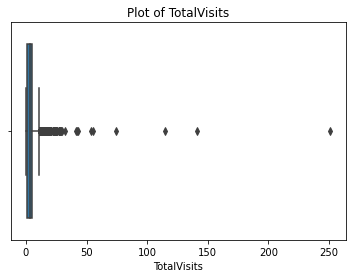

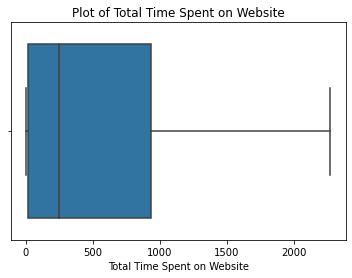

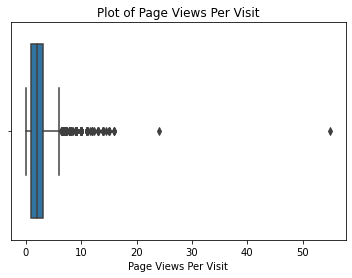

In [77]:
# Ploting boxplot for numerical columns

for column in leads_numerical[1:]:
    sns.boxplot(leads[column])
    plt.title('Plot of '+column)
    plt.show()

__Inference :__
- Boxplots for 'TotalVisits' and 'Page Views Per Visit' shows few outlier values which may be genuine and thus were left untreated.

# Step 3 : Data Visualization

- Plotting countsplots and Box plots for different columns for better understanding of the dataset

#### <font color = blue> Converted Column - Count Plot </font>

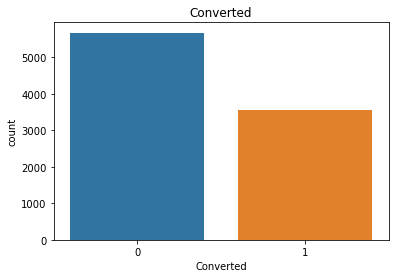

In [78]:
# Converstion Counts
sns.countplot(leads.Converted)
plt.title('Converted')
plt.show()

In [79]:
### Checking the Conversion Rate
converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
converted

38.53896103896104

The plot clearly shows that converted leads are much lower than un-converted leads. The conversion rate is 38.53 % 


#### <font color = blue> Lead origin Column with Converted Column - Count Plot </font>

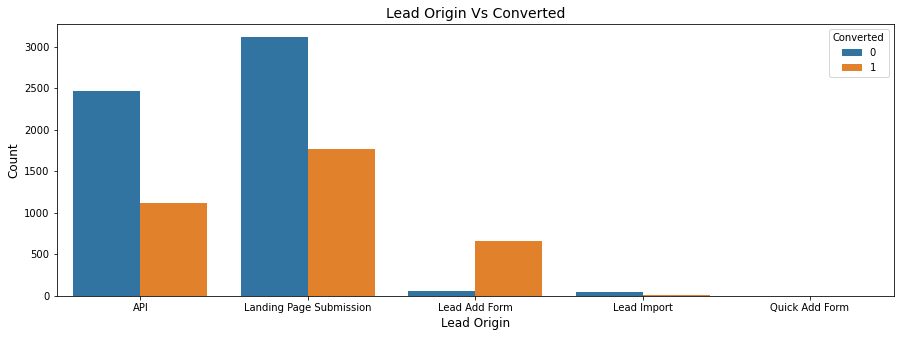

In [80]:
plt.figure(figsize=(15,5))

sns.countplot(leads['Lead Origin'], hue = leads['Converted'])

plt.title('Lead Origin Vs Converted', fontsize = 14)
plt.xlabel("Lead Origin", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.legend(loc = 'upper right', title = 'Converted')
# plt.xticks(rotation=75)

plt.show()

The plot of 'Lead Origin' clearly shows that leads from category 'Lead Add Form' have greater rate of positive conversion as compared to other Lead Origin. However the highest contributor are leads 'Landing Page Submission'. 


#### <font color = blue> Lead source with Converted Column - Count Plot </font>

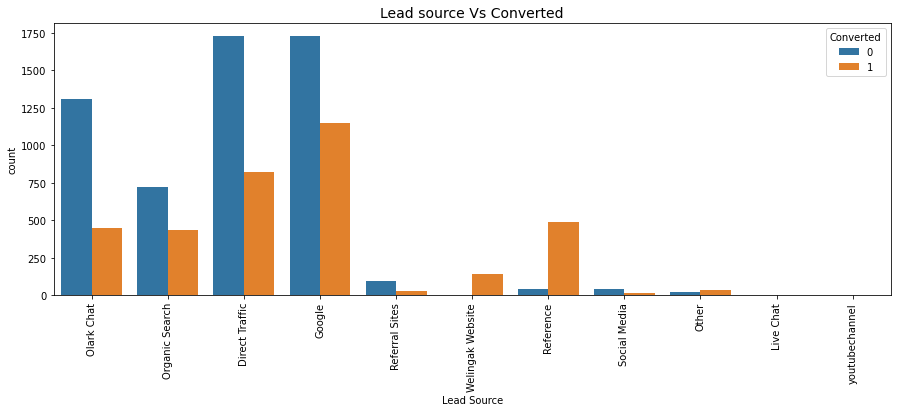

In [81]:
plt.figure(figsize=(15,5))
sns.countplot(x ='Lead Source', hue='Converted', data = leads)
plt.legend(loc = 'upper right', title = 'Converted')
plt.title('Lead source Vs Converted', fontsize = 14)


plt.xticks(rotation=90)

plt.show()

The plot of 'Lead Source' clearly shows that leads from category 'Reference' have greater rate of positive conversion as compared to other Lead Source. However the highest contributor to conversion rate are leads from 'Google'.

#### <font color = blue> Specialization with Converted Column </font

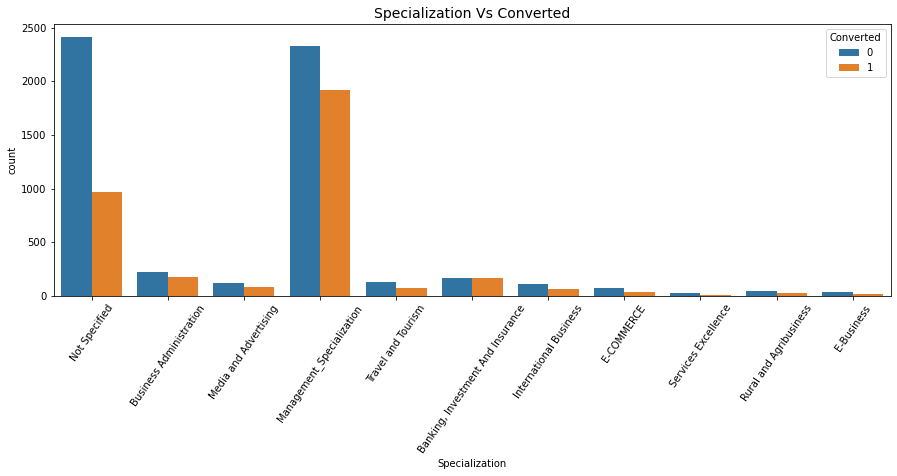

In [82]:
plt.figure(figsize=(15,5))
sns.countplot(x ='Specialization', hue='Converted', data = leads)
plt.legend(loc = 'upper right', title = 'Converted')
plt.title('Specialization Vs Converted', fontsize = 14)


plt.xticks(rotation=55)

plt.show()

The plot of 'Specialization' clearly shows that leads from 'Banking, Investment and Insurance' have equal rate of positive conversion as compared to other fields of Specialization. However the highest contributor to conversion rate are leads from 'Management Specialization'.

#### <font color = blue> City vs Converted </font>

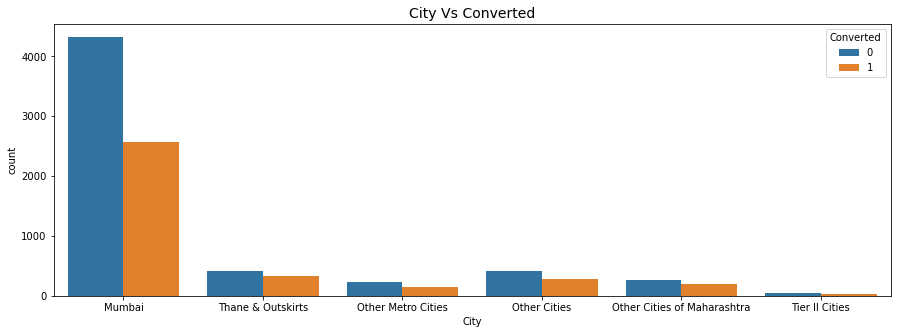

In [83]:
plt.figure(figsize=(15,5))
sns.countplot(x ='City', hue='Converted', data = leads)
plt.legend(loc = 'upper right', title = 'Converted')
plt.title('City Vs Converted', fontsize = 14)



plt.show()

The highest contributor to conversion rate are leads from city of 'Mumbai'.

#### <font color = blue> What is your current occupation vs Converted </font>

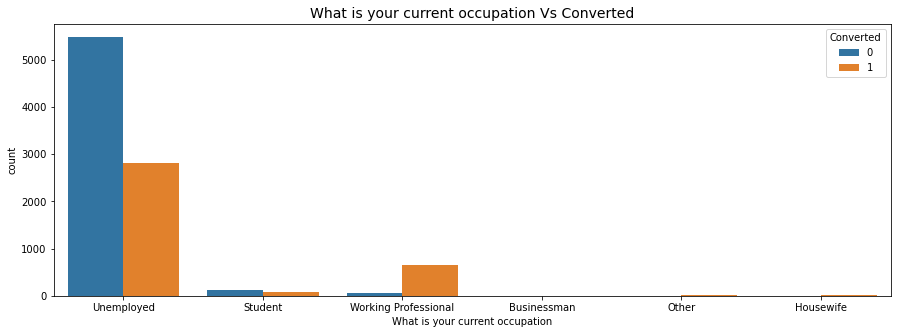

In [84]:
plt.figure(figsize=(15,5))
sns.countplot(x ='What is your current occupation', hue='Converted', data = leads)
plt.legend(loc = 'upper right', title = 'Converted')
plt.title('What is your current occupation Vs Converted', fontsize = 14)


# plt.xticks(rotation=15)

plt.show()

The plot of 'What is your current occupation' clearly shows that leads of 'Working Professional' have higher rate of positive conversion as compared to other occupation. However the highest contributor to conversion rate are leads which are 'Unemployed'.

###  <font color = blue> Heat Map </font>

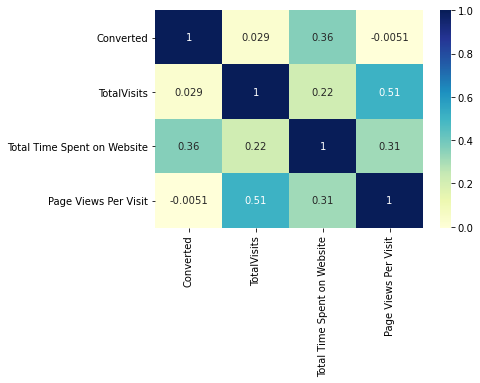

In [85]:
sns.heatmap(leads.corr(), cmap = 'YlGnBu', annot=True)
plt.show()

The heatmap shows weak correlation between the numeric variables except 'Total Visits' and 'Page Views per Visit' which have a moderate correlation with each other. 

In [86]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9240 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9240 non-null   float64
 7   Last Activity                           9240 non-null   object 
 8   Specialization                          9240 non-null   object 
 9   What is your current occupation         9240 non-null   object 
 10  City                                    9240 non-null   obje

# Step 4 : Dummy Variable Creation

In [87]:
# Selecting categorical columns for Dummy Variable Creation

leads.select_dtypes(include='object').columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [88]:
# Binary Mapping

varlist =  ['Do Not Email','A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

leads[varlist] = leads[varlist].apply(binary_map)

In [89]:
# Creating Dummy Variables

leads = pd.get_dummies(leads, drop_first=True, prefix=['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation','City','Last Notable Activity'] )

#Do not email and A free copy of mastering the inteview were not included for dummy creation since these variables contains only 2 categories

In [90]:
# Checking the Head of the Dataframe after creating dummy variables

leads.head(5)

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,1,2.0,1428,1.0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [91]:
leads.shape

(9240, 72)

# Step 5 : Splitting Train & Test Datasets

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
# Putting feature variable to X
X=leads.drop('Converted', axis=1)

# Putting response variable to y
y = leads['Converted']

In [94]:
# Splitting the data into train and test
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# Step 6 : Feature Scaling

In [95]:
from sklearn.preprocessing import StandardScaler

In [96]:
scaler = StandardScaler()

In [97]:
num_vars = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1871,0,-0.656434,-0.885371,-1.085519,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6795,0,0.100767,0.005716,-0.470569,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3516,0,0.290067,-0.691418,0.070401,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8105,0,0.290067,1.365219,1.226321,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3934,0,-0.656434,-0.885371,-1.085519,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


# Step 7 : Model Building

In [98]:
import statsmodels.api as sm

In [99]:
# Logistic regression 1st model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6400
Model Family:                Binomial   Df Model:                           67
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 11 Apr 2021   Deviance:                          nan
Time:                        16:52:51   Pearson chi2:                 6.94e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                 4.191e+15   3.65e+07   1.15e+08      0.000    4.19e+15    4.19e+15
Do Not Email                                         -6.178e+14   4.43e+06   -1.4e+08      0.000   -6.18e+14   -6.18e+14
TotalVisits                                           6.588e+13   9.94e+05   6.63e+07      0.000    6.59e+13    6.59e+13
Total Time Spent on Website                           1.381e+14   9.64e+05   1.43e+08      0.000    1.38e+14    1.38e+14
Page Views Per Visit                                  3.479e+13    1.2e+06    2.9e+07      0.000    3.48e+13    3.48e+13
A free copy of Mastering The Interview                1.034e+14   2.67e+06   3.87e+07      0.000    1.03e+14    1.03e+14
Lead Origin_Landing Page Submission                  -3.171e+14   3.37e+06  -9.42e+07      0.000   -3.17e+14   -3.17e+14
Lead Origin_Lead Add Form                             1.518e+15   2.06e+07   7.36e+07      0.000    1.52e+15    1.52e+15
Lead Origin_Lead Import                              -6.952e+14   3.53e+07  -1.97e+07      0.000   -6.95e+14   -6.95e+14
Lead Origin_Quick Add Form                            5.439e+15   7.04e+07   7.72e+07      0.000    5.44e+15    5.44e+15
Lead Source_Google                                    1.838e+14   2.82e+06   6.51e+07      0.000    1.84e+14    1.84e+14
Lead Source_Live Chat                                 2.845e+15   5.18e+07    5.5e+07      0.000    2.85e+15    2.85e+15
Lead Source_Olark Chat                               -1.537e+14    3.9e+06  -3.94e+07      0.000   -1.54e+14   -1.54e+14
Lead Source_Organic Search                            5.153e+13    3.2e+06   1.61e+07      0.000    5.15e+13    5.15e+13
Lead Source_Other                                     -5.11e+14   1.85e+07  -2.77e+07      0.000   -5.11e+14   -5.11e+14
Lead Source_Reference                                  6.32e+12   2.09e+07   3.02e+05      0.000    6.32e+12    6.32e+12
Lead Source_Referral Sites                           -2.489e+14   7.57e+06  -3.29e+07      0.000   -2.49e+14   -2.49e+14
Lead Source_Social Media                              5.112e+14   3.42e+07    1.5e+07      0.000    5.11e+14    5.11e+14
Lead Source_Welingak Website                          1.963e+14   2.18e+07   9.01e+06      0.000    1.96e+14    1.96e+14
Lead Source_youtubechannel                           -4.018e+15   6.84e+07  -5.88e+07      0.000   -4.02e+15   -4.02e+15
Last Activity_Converted to Lead                       -4.73e+15   2.78e+07   -1.7e+08      0.000   -4.73e+15   -4.73e+15
Last Activity_Email Bounced                          -4.564e+15   2.82e+07  -1.62e+08      0.000   -4.56e+15   -4.56e+15
Last Activity_Email Link Clicked                     -4.28

###  Feature Selection Using RFE

In [100]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [101]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [102]:
rfe.support_

array([ True, False,  True, False, False,  True,  True, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False,  True,  True, False, False, False, False,  True,  True,
        True,  True, False,  True, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False,  True, False, False, False,  True, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False, False, False, False,  True,  True, False, False])

In [103]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 29),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 31),
 ('A free copy of Mastering The Interview', False, 18),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 30),
 ('Lead Origin_Quick Add Form', False, 26),
 ('Lead Source_Google', False, 34),
 ('Lead Source_Live Chat', False, 22),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 36),
 ('Lead Source_Other', False, 15),
 ('Lead Source_Reference', False, 14),
 ('Lead Source_Referral Sites', False, 49),
 ('Lead Source_Social Media', False, 28),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_youtubechannel', False, 39),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 7),
 ('Last Activity_Email Marked Spam', False, 25),
 ('Last Activity_Email Opened', Fals

In [104]:
col = X_train.columns[rfe.support_]

In [105]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Google',
       'Lead Source_Live Chat', 'Lead Source_Organic Search',
       'Lead Source_Other', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_youtubechannel', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Opened',
       'Last Activity_Email Received', 'Last Activity_Page Visited on Website',
       'Last Activity_SMS Sent', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked',
       'Last Activity_Visited Booth in Tradeshow',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Management_Specialization',
     

#### Building Model 2

In [106]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2638.1
Date:                Sun, 11 Apr 2021   Deviance:                       5276.3
Time:                        16:52:59   Pearson chi2:                 7.34e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2911      0.125     -2.337      0.019      -0.535      -0.047
Do Not Email                                            -1.1214      0.192     -5.833      0.000      -1.498      -0.745
Total Time Spent on Website                              1.0772      0.040     27.206      0.000       1.000       1.155
Lead Origin_Landing Page Submission                     -1.1292      0.128     -8.794      0.000      -1.381      -0.878
Lead Origin_Lead Add Form                                3.2734      0.217     15.096      0.000       2.848       3.698
Lead Source_Olark Chat                                   0.9778      0.122      8.032      0.000       0.739       1.216
Lead Source_Welingak Website                             2.4652      0.746      3.305      0.001       1.003       3.927
Last Activity_Converted to Lead                         -1.2253      0.218     -5.624      0.000      -1.652      -0.798
Last Activity_Email Bounced                             -1.5200      0.427     -3.562      0.000      -2.356      -0.684
Last Activity_Form Submitted on Website                 -0.8856      0.352     -2.518      0.012      -1.575      -0.196
Last Activity_Had a Phone Conversation                   0.3862      0.957      0.404      0.686      -1.489       2.261
Last Activity_Olark Chat Conversation                   -1.3786      0.169     -8.171      0.000      -1.709      -1.048
Last Activity_Others                                    -1.6074      0.445     -3.610      0.000      -2.480      -0.735
Last Activity_Resubscribed to emails                    23.9640   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Specialization_Not Specified                            -1.1309      0.123     -9.175      0.000      -1.372      -0.889
What is your current occupation_Housewife               23.0773   1.33e+04      0.002      0.999   -2.61e+04    2.62e+04
What is your current occupation_Working Professional     2.6425      0.193     13.711      0.000       2.265       3.020
Last Notable Activity_Email Bounced                      1.8635      0.612      3.045      0.002       0.664       3.063
Last Notable Activity_Had a Phone Conversation           3.0246      1.462      2.069      0.039       0.160       5.890
Last Notable Activity_SMS Sent                           1.4863      0.080     18.588      0.000       1.330       1.643
Last Notable Activity_Unreachable                        1.6254      0.519      3.130      0.002       0.608       2.643
========================================================================================================================
"""

#### dropping column with high p-value

In [107]:
col = col.drop('Last Activity_Resubscribed to emails')

#### Building Model 3

In [108]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2639.7
Date:                Sun, 11 Apr 2021   Deviance:                       5279.5
Time:                        16:53:00   Pearson chi2:                 7.34e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2920      0.125     -2.344      0.019      -0.536      -0.048
Do Not Email                                            -1.1218      0.192     -5.835      0.000      -1.499      -0.745
Total Time Spent on Website                              1.0771      0.040     27.203      0.000       0.999       1.155
Lead Origin_Landing Page Submission                     -1.1277      0.128     -8.784      0.000      -1.379      -0.876
Lead Origin_Lead Add Form                                3.2735      0.217     15.098      0.000       2.849       3.698
Lead Source_Olark Chat                                   0.9831      0.122      8.080      0.000       0.745       1.222
Lead Source_Welingak Website                             2.4642      0.746      3.303      0.001       1.002       3.926
Last Activity_Converted to Lead                         -1.2259      0.218     -5.627      0.000      -1.653      -0.799
Last Activity_Email Bounced                             -1.5209      0.427     -3.565      0.000      -2.357      -0.685
Last Activity_Form Submitted on Website                 -0.8863      0.352     -2.520      0.012      -1.576      -0.197
Last Activity_Had a Phone Conversation                   0.3856      0.957      0.403      0.687      -1.489       2.261
Last Activity_Olark Chat Conversation                   -1.3830      0.169     -8.200      0.000      -1.714      -1.052
Last Activity_Others                                    -1.6078      0.445     -3.611      0.000      -2.480      -0.735
Specialization_Not Specified                            -1.1287      0.123     -9.159      0.000      -1.370      -0.887
What is your current occupation_Housewife               23.0770   1.33e+04      0.002      0.999   -2.61e+04    2.62e+04
What is your current occupation_Working Professional     2.6422      0.193     13.711      0.000       2.265       3.020
Last Notable Activity_Email Bounced                      1.8636      0.612      3.045      0.002       0.664       3.063
Last Notable Activity_Had a Phone Conversation           3.0247      1.462      2.069      0.039       0.160       5.890
Last Notable Activity_SMS Sent                           1.4847      0.080     18.573      0.000       1.328       1.641
Last Notable Activity_Unreachable                        1.6243      0.519      3.127      0.002       0.606       2.642
========================================================================================================================
"""

#### dropping column with high p-value

In [109]:
col = col.drop('What is your current occupation_Housewife')

#### Building Model 4


In [110]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2647.3
Date:                Sun, 11 Apr 2021   Deviance:                       5294.6
Time:                        16:53:00   Pearson chi2:                 7.35e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2896      0.124     -2.327      0.020      -0.533      -0.046
Do Not Email                                            -1.1271      0.192     -5.865      0.000      -1.504      -0.750
Total Time Spent on Website                              1.0758      0.040     27.208      0.000       0.998       1.153
Lead Origin_Landing Page Submission                     -1.1205      0.128     -8.740      0.000      -1.372      -0.869
Lead Origin_Lead Add Form                                3.2863      0.217     15.173      0.000       2.862       3.711
Lead Source_Olark Chat                                   0.9819      0.122      8.074      0.000       0.744       1.220
Lead Source_Welingak Website                             2.4482      0.746      3.283      0.001       0.986       3.910
Last Activity_Converted to Lead                         -1.2312      0.218     -5.655      0.000      -1.658      -0.804
Last Activity_Email Bounced                             -1.5234      0.427     -3.570      0.000      -2.360      -0.687
Last Activity_Form Submitted on Website                 -0.7927      0.343     -2.312      0.021      -1.465      -0.121
Last Activity_Had a Phone Conversation                   0.3813      0.956      0.399      0.690      -1.493       2.256
Last Activity_Olark Chat Conversation                   -1.3847      0.169     -8.212      0.000      -1.715      -1.054
Last Activity_Others                                    -1.5926      0.443     -3.596      0.000      -2.461      -0.725
Specialization_Not Specified                            -1.1297      0.123     -9.178      0.000      -1.371      -0.888
What is your current occupation_Working Professional     2.6338      0.193     13.677      0.000       2.256       3.011
Last Notable Activity_Email Bounced                      1.8667      0.612      3.050      0.002       0.667       3.066
Last Notable Activity_Had a Phone Conversation           3.0200      1.461      2.066      0.039       0.156       5.884
Last Notable Activity_SMS Sent                           1.4784      0.080     18.510      0.000       1.322       1.635
Last Notable Activity_Unreachable                        1.6177      0.519      3.115      0.002       0.600       2.635
========================================================================================================================
"""

#### dropping column with high p-value


In [111]:
col = col.drop('Last Activity_Had a Phone Conversation')

#### Building Model 5

In [112]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2647.4
Date:                Sun, 11 Apr 2021   Deviance:                       5294.8
Time:                        16:53:01   Pearson chi2:                 7.15e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2888      0.124     -2.321      0.020      -0.533      -0.045
Do Not Email                                            -1.1270      0.192     -5.864      0.000      -1.504      -0.750
Total Time Spent on Website                              1.0762      0.040     27.224      0.000       0.999       1.154
Lead Origin_Landing Page Submission                     -1.1208      0.128     -8.741      0.000      -1.372      -0.869
Lead Origin_Lead Add Form                                3.2873      0.217     15.179      0.000       2.863       3.712
Lead Source_Olark Chat                                   0.9813      0.122      8.071      0.000       0.743       1.220
Lead Source_Welingak Website                             2.4468      0.746      3.281      0.001       0.985       3.909
Last Activity_Converted to Lead                         -1.2323      0.218     -5.660      0.000      -1.659      -0.806
Last Activity_Email Bounced                             -1.5249      0.427     -3.573      0.000      -2.361      -0.688
Last Activity_Form Submitted on Website                 -0.7936      0.343     -2.314      0.021      -1.466      -0.121
Last Activity_Olark Chat Conversation                   -1.3853      0.169     -8.216      0.000      -1.716      -1.055
Last Activity_Others                                    -1.5946      0.443     -3.601      0.000      -2.463      -0.727
Specialization_Not Specified                            -1.1292      0.123     -9.175      0.000      -1.370      -0.888
What is your current occupation_Working Professional     2.6358      0.192     13.694      0.000       2.259       3.013
Last Notable Activity_Email Bounced                      1.8671      0.612      3.051      0.002       0.668       3.067
Last Notable Activity_Had a Phone Conversation           3.4008      1.106      3.075      0.002       1.233       5.568
Last Notable Activity_SMS Sent                           1.4776      0.080     18.504      0.000       1.321       1.634
Last Notable Activity_Unreachable                        1.6171      0.519      3.114      0.002       0.599       2.635
========================================================================================================================
"""

### Checking VIF values for Feature Variables

In [113]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [114]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Source_Olark Chat,2.05
11,Specialization_Not Specified,2.05
7,Last Activity_Email Bounced,1.95
0,Do Not Email,1.83
3,Lead Origin_Lead Add Form,1.61
15,Last Notable Activity_SMS Sent,1.46
9,Last Activity_Olark Chat Conversation,1.46
2,Lead Origin_Landing Page Submission,1.45
1,Total Time Spent on Website,1.27
5,Lead Source_Welingak Website,1.26


- We can find that in the final model, all the VIF values are less than 5 and P-Values are less than 0.05

In [115]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.435284
6795    0.073601
3516    0.234904
8105    0.823070
3934    0.199479
4844    0.991064
3297    0.100199
8071    0.995288
987     0.119376
7423    0.898853
dtype: float64

In [116]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.43528389, 0.07360127, 0.23490416, 0.82306999, 0.19947903,
       0.99106385, 0.10019925, 0.99528816, 0.11937577, 0.89885264])

##### Creating a dataframe with the actual Converted flag and the predicted probabilities

In [117]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Lead ID
0,0,0.435284,1871
1,0,0.073601,6795
2,0,0.234904,3516
3,0,0.823070,8105
4,0,0.199479,3934


##### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0


In [118]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Lead ID,Predicted
0,0,0.435284,1871,0
1,0,0.073601,6795,0
2,0,0.234904,3516,0
3,0,0.823070,8105,1
4,0,0.199479,3934,0


### Confusion Matrix & Accuracy

In [119]:
from sklearn import metrics

In [120]:
# Confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3552  450]
 [ 723 1743]]


In [121]:

# Predicted     not_converted    converted
# Actual
# not_converted        3552      450
# converted            723      1743

In [122]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))


0.8186456400742115


In [123]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [124]:
# Let's see the sensitivity of our logistic regression model(Recall)
TP / float(TP+FN)

0.7068126520681265

In [125]:
# Let us calculate specificity
TN / float(TN+FP)

0.8875562218890555

In [126]:
# Calculate false postive rate - predicting converted when customer was not converted
print(FP/ float(TN+FP))

0.11244377811094453


In [127]:
# positive predictive value - Precision
print (TP / float(TP+FP))

0.7948016415868673


In [128]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8308771929824561


# Step 8 : Plotting the ROC Curve

In [129]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [130]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, 
                                         drop_intermediate = False )

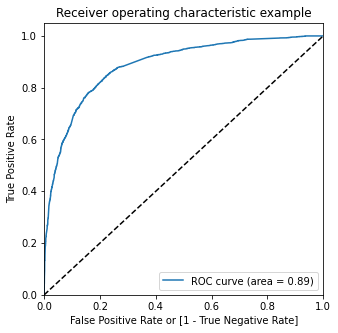

In [131]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)


We plotted the ROC curve for the remaining features and found the curve is decent with 89% area coverage

# Step 9 : Finding Optimal Cutoff Point

In [132]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.435284,1871,0,1,1,1,1,1,0,0,0,0,0
1,0,0.073601,6795,0,1,0,0,0,0,0,0,0,0,0
2,0,0.234904,3516,0,1,1,1,0,0,0,0,0,0,0
3,0,0.823070,8105,1,1,1,1,1,1,1,1,1,1,0
4,0,0.199479,3934,0,1,1,0,0,0,0,0,0,0,0


In [133]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.598949  0.969992  0.370315
0.2   0.2  0.780612  0.882401  0.717891
0.3   0.3  0.801948  0.847932  0.773613
0.4   0.4  0.816945  0.783455  0.837581
0.5   0.5  0.818646  0.706813  0.887556
0.6   0.6  0.804113  0.606245  0.926037
0.7   0.7  0.789889  0.530819  0.949525
0.8   0.8  0.763142  0.427007  0.970265
0.9   0.9  0.716759  0.277778  0.987256


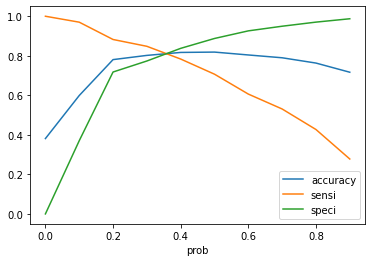

In [134]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
# plt.figure(figsize=(10,5))
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

- The intersection point of the lines would be considered as Optimal cut-off point and the cut-off point was found out to be 0.38

In [135]:
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.38 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Lead ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.435284,1871,0,1,1,1,1,1,0,0,0,0,0,1
1,0,0.073601,6795,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.234904,3516,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.823070,8105,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.199479,3934,0,1,1,0,0,0,0,0,0,0,0,0


###  Calculating Lead Score

In [136]:
y_train_pred_final['lead_score'] = y_train_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Converted_Prob,Lead ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted,lead_score
0,0,0.435284,1871,0,1,1,1,1,1,0,0,0,0,0,1,44
1,0,0.073601,6795,0,1,0,0,0,0,0,0,0,0,0,0,7
2,0,0.234904,3516,0,1,1,1,0,0,0,0,0,0,0,0,23
3,0,0.823070,8105,1,1,1,1,1,1,1,1,1,1,0,1,82
4,0,0.199479,3934,0,1,1,0,0,0,0,0,0,0,0,0,20


In [137]:
# checking if 80% cases are correctly predicted based on the converted column.

# total no. of final predicted conversion / non conversion counts from the actual converted rates

checking_df = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','final_Predicted']]
checking_df['final_Predicted'].value_counts()

1    1957
0     509
Name: final_Predicted, dtype: int64

In [138]:
# check the precentage of final_predicted conversions

1957/(1965+509)

0.7910266774454325

- Based on the new Optimal cut-off point, we found that near to 80% of the values were correctly predicted by the model.

In [139]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.8118429189857761

In [140]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3294,  708],
       [ 509, 1957]], dtype=int64)

In [141]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [142]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7935928629359287

In [143]:
# Let us calculate specificity
TN / float(TN+FP)

0.823088455772114

In [144]:
# Calculate false postive rate - 
print(FP/ float(TN+FP))


0.17691154422788605


In [145]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7343339587242026


In [146]:
# Negative predictive value

print (TN / float(TN+ FN))

0.8661582960820405


# Step 10 : Precision & Recall

In [147]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3552,  450],
       [ 723, 1743]], dtype=int64)

In [148]:
from sklearn.metrics import precision_score, recall_score

In [149]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.7343339587242026

In [150]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.7935928629359287

### Precision & Recall Tradeoff

In [151]:
from sklearn.metrics import precision_recall_curve

In [152]:
y_train_pred_final.Converted, y_train_pred_final.Predicted


(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    1
 6466    0
 6467    0
 Name: Converted, Length: 6468, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6463    1
 6464    1
 6465    0
 6466    0
 6467    0
 Name: Predicted, Length: 6468, dtype: int64)

In [153]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)


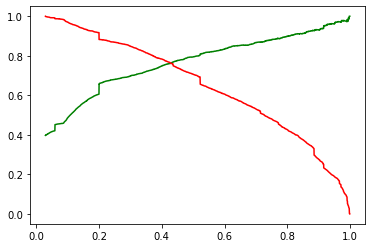

In [154]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

The graph depicts the optimal cutoff is 0.41 based on Precision and Recall

# Step 11 : Making predictions on the Test Set

In [155]:
num_vars = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

X_test[num_vars] = scaler.transform(X_test[num_vars])

In [156]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Specialization_Not Specified,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable
4269,0,0.964504,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2376,0,-0.885371,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
7766,0,-0.777416,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
9199,0,-0.885371,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0
4359,0,-0.885371,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [157]:
X_test_sm = sm.add_constant(X_test)

In [158]:
y_test_pred = res.predict(X_test_sm)

In [159]:
y_test_pred[:10]

4269    0.749804
2376    0.916375
7766    0.958009
9199    0.058697
4359    0.885512
9186    0.579410
1631    0.409112
8963    0.136681
8007    0.051302
5324    0.361305
dtype: float64

In [160]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [161]:
y_pred_1.head()

,0
4269,0.749804
2376,0.916375
7766,0.958009
9199,0.058697
4359,0.885512


In [162]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [163]:
# Putting LeadId to index

y_test_df['Lead Id'] = y_test_df.index

In [164]:
# Removing index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [165]:
# Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [166]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Converted,Lead Id,0
0,1,4269,0.749804
1,1,2376,0.916375
2,1,7766,0.958009
3,0,9199,0.058697
4,1,4359,0.885512


In [167]:
# Renaming the column 

y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [168]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Lead Id','Converted','Converted_Prob'], axis=1)

In [169]:
y_pred_final.head()

,Lead Id,Converted,Converted_Prob
0,4269,1,0.749804
1,2376,1,0.916375
2,7766,1,0.958009
3,9199,0,0.058697
4,4359,1,0.885512


In [170]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.27 else 0)

In [171]:
y_pred_final.head(20)

,Lead Id,Converted,Converted_Prob,final_Predicted
0,4269,1,0.749804,1
1,2376,1,0.916375,1
2,7766,1,0.958009,1
3,9199,0,0.058697,0
4,4359,1,0.885512,1
5,9186,1,0.579410,1
6,1631,1,0.409112,1
7,8963,1,0.136681,0
8,8007,0,0.051302,0
9,5324,1,0.361305,1


In [172]:
# Now let us calculate the lead score

y_pred_final['lead_score'] = y_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_pred_final.head(20)

,Lead Id,Converted,Converted_Prob,final_Predicted,lead_score
0,4269,1,0.749804,1,75
1,2376,1,0.916375,1,92
2,7766,1,0.958009,1,96
3,9199,0,0.058697,0,6
4,4359,1,0.885512,1,89
5,9186,1,0.579410,1,58
6,1631,1,0.409112,1,41
7,8963,1,0.136681,0,14
8,8007,0,0.051302,0,5
9,5324,1,0.361305,1,36


In [173]:
# Let's check the overall accuracy.

metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.8026695526695526

In [174]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted)
confusion2

array([[1290,  387],
       [ 160,  935]], dtype=int64)

In [175]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [176]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8538812785388128

In [177]:
# Let us check specificity
TN / float(TN+FP)

0.7692307692307693

In [178]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.7072617246596067

In [179]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.8538812785388128

# <font color = blue> Summary : </font>

- The top three variables in the model which contribute most towards the probability of a lead getting converted are 'Last Notable Activity_Had a Phone Conversation', 'Lead Origin_Lead Add Form' and 'What is your current occupation_Working Professional'.
- Then finally we implemented the Model on Test Data set and found out that the accuracy value is 80.26%, sensitivity 85.38% and specificity is 76.92%.